In [1]:
import quandl
import pandas as pd
import numpy as np
from datetime import datetime, date
import missingno as msno
import configparser
config = configparser.ConfigParser()
config.read('config.cfg')

from table_preprocess import create_abs_meta_table, create_abs_data_table, create_market_cap_table, create_time_table

## Step 1: Scope the Project and Gather Data


A fictious Investment Company based in Australia wants to be able to track a Stock Market Capitalisation to GDP ratio by industry: https://www.investopedia.com/terms/m/marketcapgdp.asp#:~:text=The%20stock%20market%20capitalization%2Dto%2DGDP%20ratio%20is%20a%20ratio,compared%20to%20a%20historical%20average.&text=It%20is%20calculated%20by%20dividing,gross%20domestic%20product%20(GDP).

They have recruited me as their Data Engineer to utilise free sources from the web to construct a denormalised data table for their internal analysts to use and build visualisations from. They do not currently have an existing Cloud Warehouse provider but are open to investing if they can see a return on their investment in the future. 

The task is to find Australian GDP chain volume measures by industry and compare this with the current market capitilisation by industry with publicly listed companies in Australia.

The Australian Bureau of Statistics is responsible for measuring the Gross Domestic Product and the Australian Securities Exchange is Australia's primary securities exchange, which monitors market capitalisation. 

Quandl is a data provider in the financial industry which has some free datasets and some paid. Fortunately, they provide Gross Domestic Product figures within their free service, so this will be utilised. The drawback is that **their dataset is over 15 million rows**, so some data manipulation is required.





### Data Source 1:

A Large **CSV** file that contains economic, environmental, and social issues statistics from the Australian Bureau of Statistics. This was downloaded from Quandl: https://www.quandl.com/databases/AUSBS/documentation . **It's data size is: 15,653,933 rows**

In [2]:
data_source_1 = pd.read_csv("Data\AUSBS_D_44bdddab4eb5d8444be5683469c73cbb.csv")
len(data_source_1)

15653933

### Data Source 2:

The metadata associated with Data Source 1. The data will be retrieved via the Quandl **API**: https://www.quandl.com/tools/api **It's data size is: 102,718 rows**

In [3]:
quandl.ApiConfig.api_key = '1gm_KQciW5FsfU7EmzaY'
data_source_2 = quandl.get_table("AUSBS/M", paginate=True)
len(data_source_2)

102718

### Data Source 3:

The 3rd data source is from the  Australian Securities Exchange which is Australia's primary securities exchange (trading shares). This data source will be used to compare the Market Cap of the industries in Australia with the Gross Domestic Product value. The data source is here: https://www2.asx.com.au/markets/trade-our-cash-market/directory

It's data size is: 2,003

In [4]:
data_source_3 = pd.read_csv("Data\ASX_Listed_Companies_26-05-2021_12-47-08_AEST.csv")
len(data_source_3)

2003

### Data Source 4:

The 4th data source is from a **JSON** file which is the 'map' between the ABS economic data and the ASX Market Cap data.

In [5]:
data_source_4 = pd.read_json(r"Data\abs_asx_map.json")
len(data_source_4)

22

## Step 2: Explore and Assess the Data

**Please note that there are seperate functions located within `table_preprocess.py` that assist with the pre-processing of the data, these include:**

- create_abs_meta_table
- create_abs_data_table
- create_market_cap_table
- create_time_table

There is also a JSON mapping table to assist some of these functions - it helps combine the GDP data with the Market Capitilisation Data.

## create_abs_meta_table

In [6]:
abs_meta_data = create_abs_meta_table(config.get('QUANDL','API'), r"Data\abs_asx_map.json")
abs_meta_data.head()

,ABS_CODE_PERCENT_CHNG,ABS_Description,GIC ASX Definition,name,units,type,month
ABS_CODE_SEASONAL_ADJ,,,,,,,
A2716160J,A2716040R,"Agriculture, forestry and fishing (A) ;","Food, Beverage & Tobacco","Agriculture, forestry and fishing (A)",$ Millions,Seasonally Adjusted,3
A2716163R,A2716043W,Mining (B) ;,Energy,Mining (B),$ Millions,Seasonally Adjusted,3
A2716166W,A2716046C,Manufacturing (C) ;,Materials,Manufacturing (C),$ Millions,Seasonally Adjusted,3
A2716175X,A2716055F,"Electricity, gas, water and waste services (D) ;",Energy,"Electricity, gas, water and waste services (D)",$ Millions,Seasonally Adjusted,3
A2716179J,A2716059R,Construction (E) ;,Materials,Construction (E),$ Millions,Seasonally Adjusted,3


In [7]:
print("Is there any duplicates: ", abs_meta_data.duplicated().any())

Is there any duplicates:  False


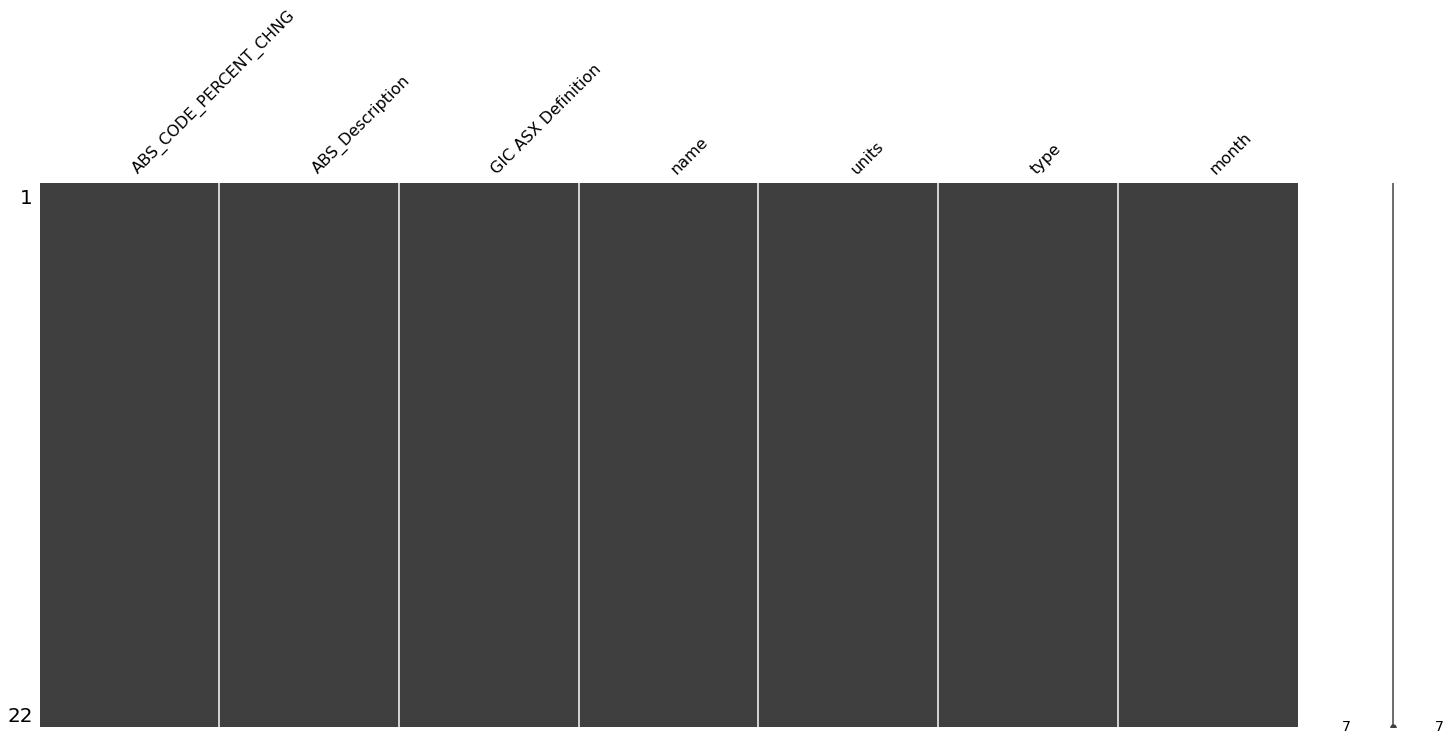

In [8]:
# Any missing data?

msno.matrix(abs_meta_data)

## create_abs_data_table

In [9]:
abs_data_table = create_abs_data_table("Data\AUSBS_D_44bdddab4eb5d8444be5683469c73cbb.csv", abs_meta_data)
abs_data_table.head()

,ABS_Description,GIC ASX Definition,name,date,seasonal_adjusted_chain_volume_measure
index,,,,,
Statistical discrepancy (P) ;-2020-03-01,Statistical discrepancy (P) ;,NA,Statistical discrepancy (P),2020-03-01,9.390000e+08
Statistical discrepancy (P) ;-2020-06-01,Statistical discrepancy (P) ;,NA,Statistical discrepancy (P),2020-06-01,1.195000e+09
Statistical discrepancy (P) ;-2018-09-01,Statistical discrepancy (P) ;,NA,Statistical discrepancy (P),2018-09-01,1.211000e+09
Statistical discrepancy (P) ;-2018-12-01,Statistical discrepancy (P) ;,NA,Statistical discrepancy (P),2018-12-01,1.271000e+09
Statistical discrepancy (P) ;-2019-03-01,Statistical discrepancy (P) ;,NA,Statistical discrepancy (P),2019-03-01,4.640000e+08


In [10]:
print("Is there any duplicates: ", abs_data_table.duplicated().any())

Is there any duplicates:  False


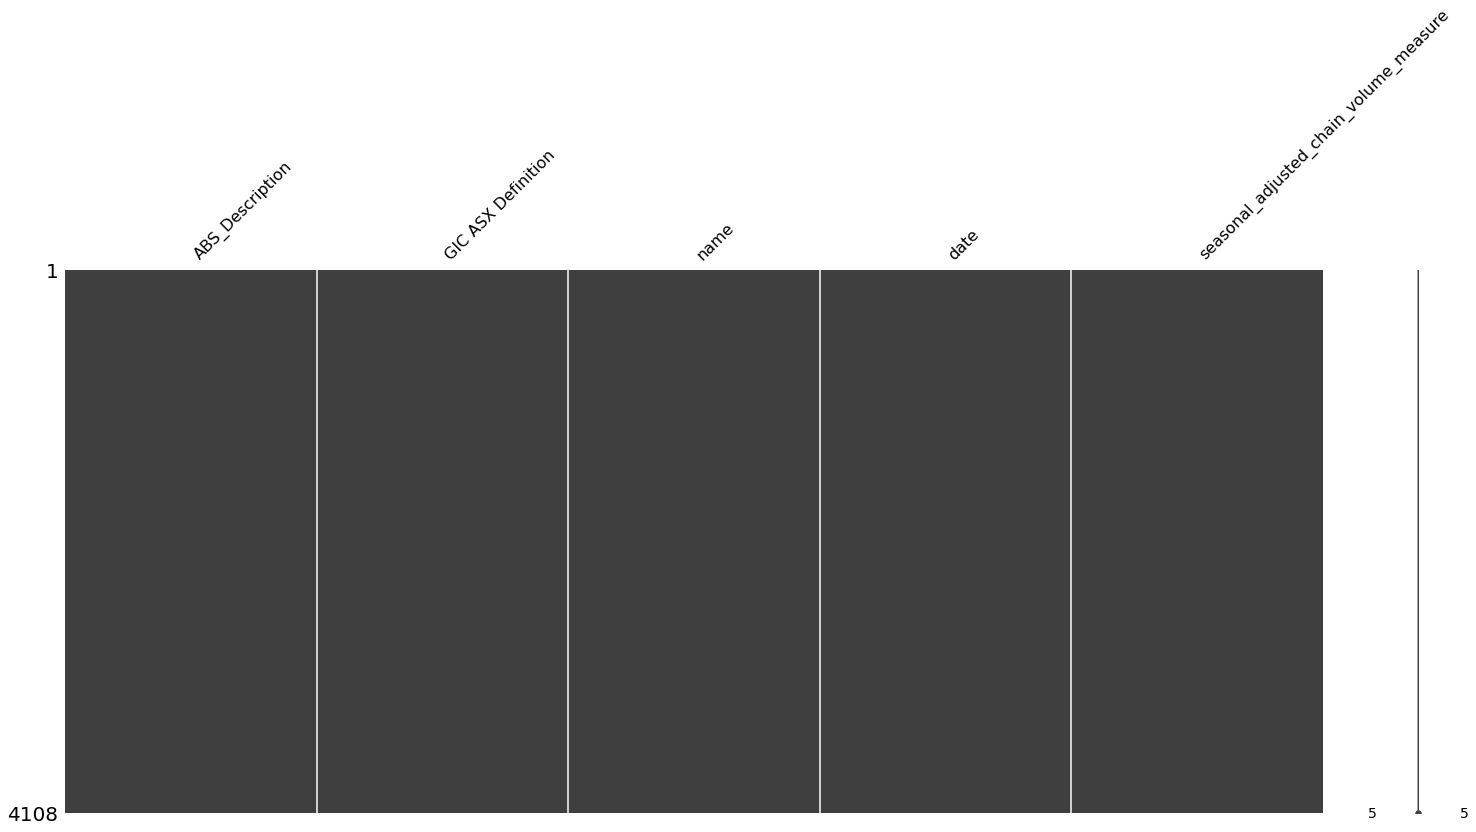

In [11]:
# Any missing data?

msno.matrix(abs_data_table)

## create_market_cap_table

In [12]:
market_cap_table = create_market_cap_table("Data\ASX_Listed_Companies_26-05-2021_12-47-08_AEST.csv", r"Data\abs_asx_map.json")
market_cap_table.head()

,Market Cap Today
ABS_Description,
Accommodation and food services (H) ;,0.000000e+00
Administrative and support services (N) ;,4.032089e+10
"Agriculture, forestry and fishing (A) ;",2.742038e+10
Arts and recreation services (R) ;,9.152242e+10
Construction (E) ;,5.647008e+11


In [13]:
market_cap_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Accommodation and food services (H) ; to Wholesale trade (F) ;
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Market Cap Today  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0+ bytes


### Mining (B) and Electricity, gas, water and waste services (D) share the same distribution of value - this is OK

### Some industries will have zero market cap - this is also OK


In [14]:
check_market_cap_table = market_cap_table

check_market_cap_table.reset_index(inplace=True)

check_market_cap_table = market_cap_table[(market_cap_table["Market Cap Today"] > 1) & market_cap_table["ABS_Description"] != "Mining (B) ;"]

print("Is there any duplicates: ", check_market_cap_table.duplicated().any())


Is there any duplicates:  False


C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


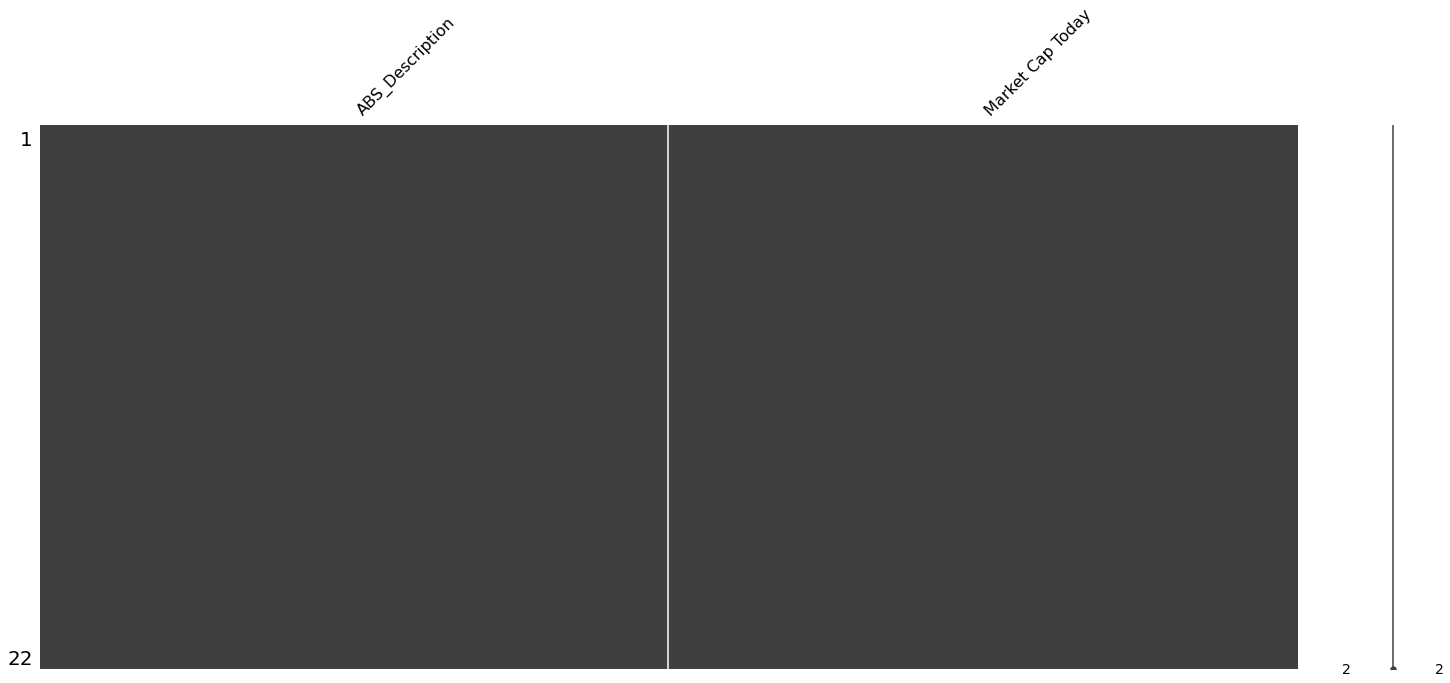

In [15]:
# Any missing data?

msno.matrix(market_cap_table)

## create_time_table

In [16]:
time_table = create_time_table() 
time_table.head()

,day,week,month,quarter,year
date,,,,,
1950-01-02,2,1,1,1,1950
1950-01-03,3,1,1,1,1950
1950-01-04,4,1,1,1,1950
1950-01-05,5,1,1,1,1950
1950-01-06,6,1,1,1,1950


In [17]:
print("Is there any duplicates: ", time_table.duplicated().any())

Is there any duplicates:  False


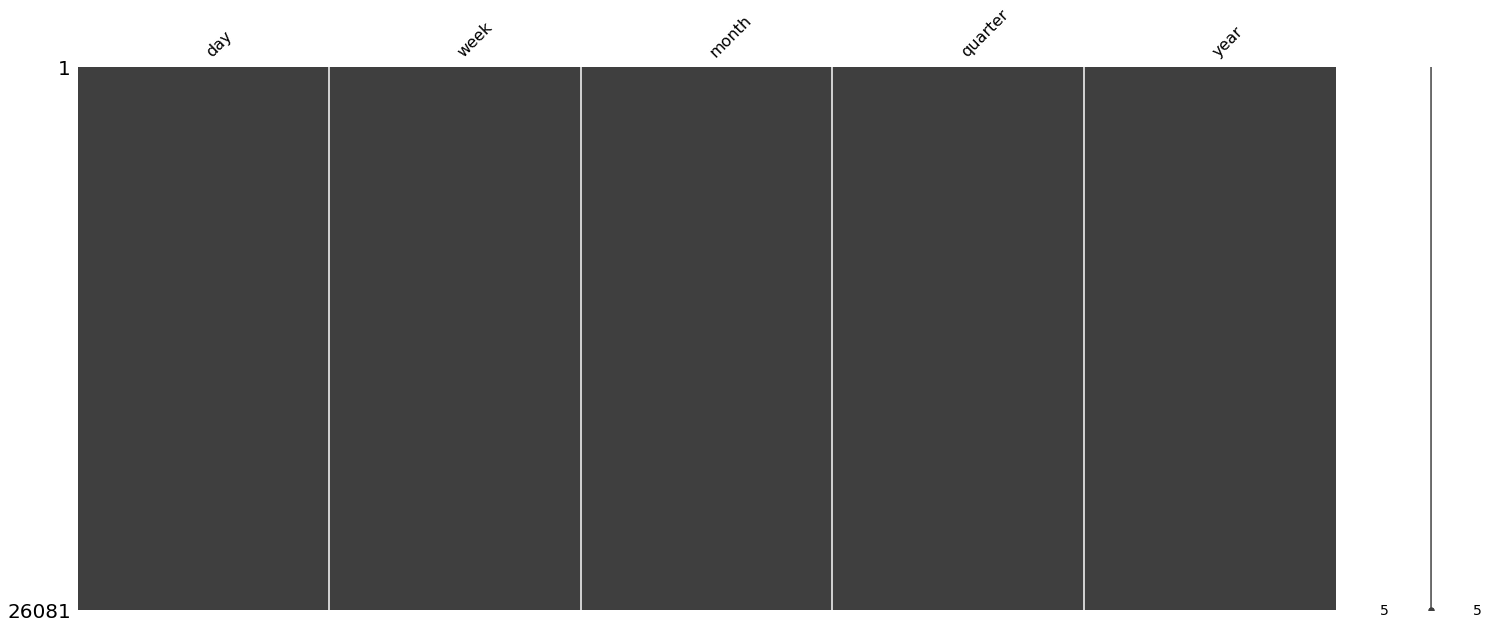

In [18]:
msno.matrix(time_table)

## Step 3: Define the Data Model


Because the requirement is to have a denormalised table which contains GDP data over time compared with market capitalisation data, the schema can appear as the following:



![image.png](assets/schema.png)


The tables that join to create the final Fact Table need their own preprocessing which is explained in Step 4 below.


## Step 4: Run ETL to Model the Data


## The ETL Big Picture:

![image.png](assets/etl.png)

## Data Dictionary


**ABS** 

Two tables will be combined to create the ABS data - the first is a dimension table that will contain metadata from the ABS data. 

- ABS_CODE_SEASONAL_ADJ = varchar (unique)
- ABS_CODE_PERCENT_CHNG = varchar
- ABS_Description = varchar
- GIC ASX Definition = varchar
- name = varchar
- units = varchar
- type = varchar
- month = varchar


The second is the ABS data measure with time series.

- series_id = varchar (unique in combination with date)
- date = varchar
- value = float64

This gets converted to the ABS Data Table:

- ABS_Description - varchar
- GIC ASX Definition - varchar
- name - varchar
- date - varchar
- seasonal_adjusted_chain_volume_measure - float64


The Market Cap Data is provided by individual company which rolls up to industries:

- ASX code - varchar
- Company name - varchar
- Listing date - varchar
- GICs industry group - varchar (this is aggregated and becomes unique)
- Market Cap - float64 (sum)

The time table is the next dimension table

- date - varchar (unique)
- day - int64
- week - int64
- month - int64
- quarter - int64
- year - int64

The final Fact Table becomes:

- index - varchar (unique)
- ABS_Description - varchar
- GIC ASX Definition - varchar
- name - varchar
- date - varchar
- seasonal_adjusted_chain_volume_measure - float64
- Market Cap Today - float64
- day - int64
- week - int64
- month - int64
- quarter - int64
- year - int64



## Testing of Data

The data is tested to ensure there are no empty (nulls) within the tables and is tested for consistency of date ranges. Please see below under "Quality Check Functions X2"


## Create the Final Fact Table

### Found in the file - `create_fact_table.py`

In [19]:
from create_fact_table import create_fact_t

fact_table = create_fact_t(create_abs_data_table, create_market_cap_table, create_time_table)
fact_table.head()

,ABS_Description,GIC ASX Definition,name,date,seasonal_adjusted_chain_volume_measure,Market Cap Today,day,week,month,quarter,year
index,,,,,,,,,,,
Statistical discrepancy (P) ;-2020-03-01,Statistical discrepancy (P) ;,Definition Not Found - Check Map File,Statistical discrepancy (P),2020-03-01,9.390000e+08,0.0,1,9,3,1,2020
Statistical discrepancy (P) ;-2020-06-01,Statistical discrepancy (P) ;,Definition Not Found - Check Map File,Statistical discrepancy (P),2020-06-01,1.195000e+09,0.0,1,23,6,2,2020
Statistical discrepancy (P) ;-2018-09-01,Statistical discrepancy (P) ;,Definition Not Found - Check Map File,Statistical discrepancy (P),2018-09-01,1.211000e+09,0.0,1,35,9,3,2018
Statistical discrepancy (P) ;-2018-12-01,Statistical discrepancy (P) ;,Definition Not Found - Check Map File,Statistical discrepancy (P),2018-12-01,1.271000e+09,0.0,1,48,12,4,2018
Statistical discrepancy (P) ;-2019-03-01,Statistical discrepancy (P) ;,Definition Not Found - Check Map File,Statistical discrepancy (P),2019-03-01,4.640000e+08,0.0,1,9,3,1,2019


In [20]:
print("Is there any duplicates: ", fact_table.duplicated().any())

Is there any duplicates:  False


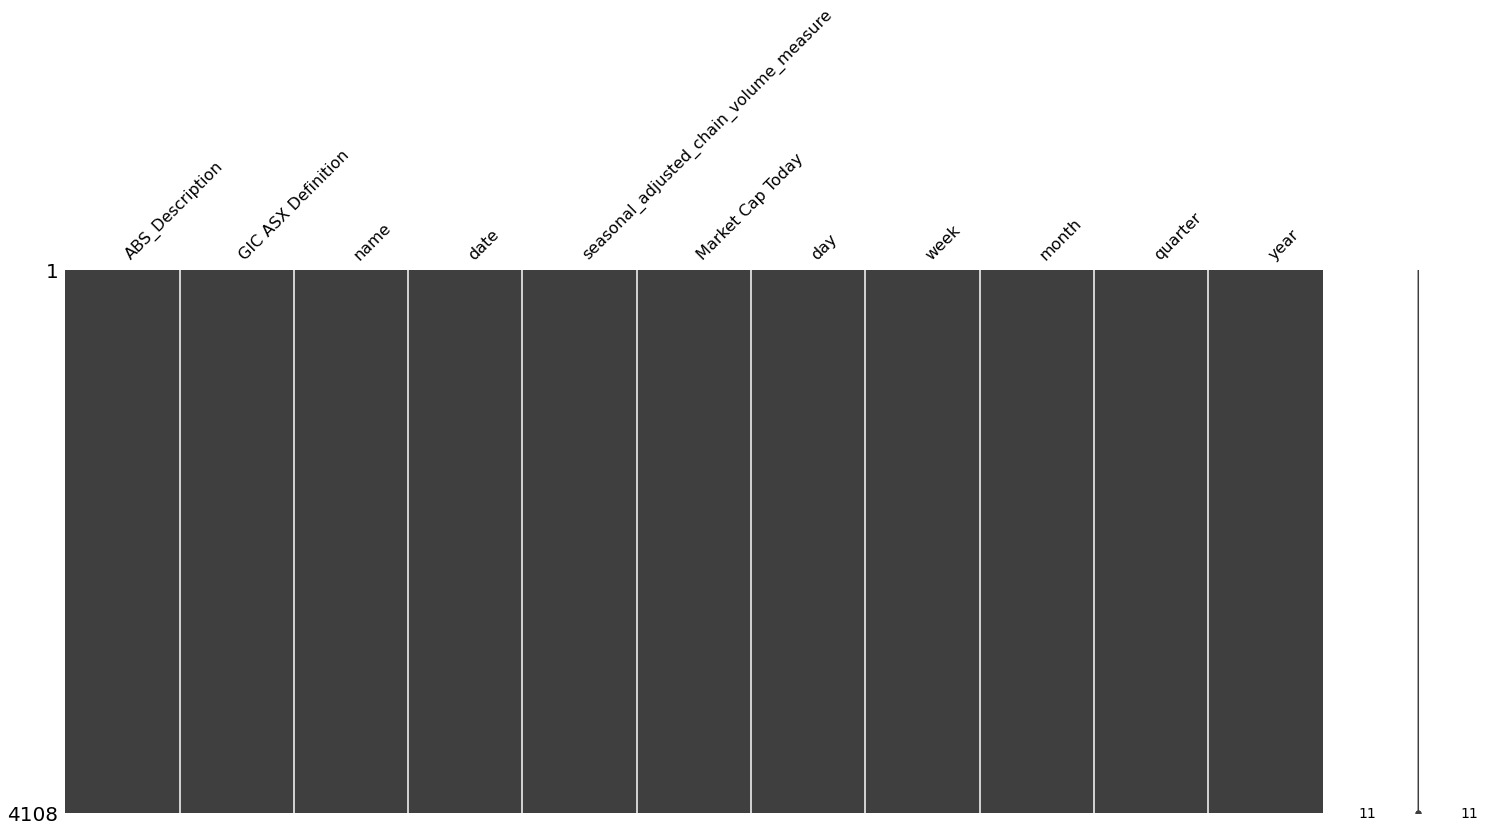

In [21]:
msno.matrix(fact_table)

# Quality Check Functions X2

### Located in `data_checks.py`

Below we test all the pre-processed tables and the fact table for:

- Any missing data (are there any nulls or blanks)
- Date Range Check in Fact Table (all industries must have the same date range otherwise the source data is wrong)


In [22]:
from data_checks import any_missing_data, date_range_check

any_missing_data(abs_meta_data)
any_missing_data(abs_data_table)
any_missing_data(market_cap_table)
any_missing_data(fact_table)
any_missing_data(time_table)

Table looks good to use
Table looks good to use
Table looks good to use
Table looks good to use
Table looks good to use


In [23]:
date_range_check(fact_table)

Date range is correct


## Step 5: Complete Project Write Up

The final goal from this data engineering project is to provide a fact table to the analysts so they can develop a dashboard with either PowerBi or Tableau. The final Fact Table is around ~4100 rows, so therefore a CSV format will suffice for this requirement for now.

**If the data was increased by 100x**

If the data increases by 100x, then more advanced techniques would need to be considered. Currently there is some Dask implemented in this data pipeline in preparation for the data size to increase. The Dask framework works on top of Pandas and provides a method of parallel computations on single machine by leveraging the multi-core CPUs - rather than a single core. PySpark can also be a solution if the data starts to increase 1000x.

**If the pipelines were run on a daily basis by 7am**

If the company's laptops are using Windows OS, then Task Scheduler can be used to help run the pipelines at 7am.

If this is not sufficient, or the requirements start to increase, then Airflow could be used to help run the ETL effectively with a lot more customisation in the scheduler. 

Note: Because it is GDP and Market Cap data, these insights would normally be presented Monthly or Quarterly.

**If the database needed to be accessed by 100+ people**

As the data can be currently accessible via a CSV file, it is highly accessible. If we needed more controls around security, then AWS would be useful with their IAM and Roles security levels.


**Summary**

Because the final solution is straight forward and provides some insight and value to this fictious Finance company in Australia, the costs and complexity also need to match this requirement. As the requirements increase, the model needs to be able to quickly scale - which is achieved in this project as it is utilising Python in a modular way and already has some form of parallel computations built in with the flask framework.

